In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from feature_engine.encoding import OneHotEncoder


# loading dataset


In [5]:
!pwd


/Users/admin/Desktop/EDA


In [6]:
df_airfare_data=pd.read_excel("/Users/admin/Desktop/EDA/Airfare_Regression_Dataset.xlsx",sheet_name='Sheet1')
#df_airfare_data = pd.read_csv("/Users/admin/Desktop/EDA/Airfare_Regression_Dataset.csv")


In [7]:
df_airfare_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
pd.options.display.max_columns = None


In [9]:
df_airfare_data.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [10]:
# data types
df_airfare_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
#checking null values
df_airfare_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# checking null values
sd = df_airfare_data[df_airfare_data.isnull().any(axis=1)]
sd.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
# fill na with suitable values by selecting same airline, source, destination, same departure, arrival time, duration, day of departure 
df_airfare_data["Route"].fillna("DEL → HYD → MAA → COK", inplace = True)
df_airfare_data["Total_Stops"].fillna("2 stops", inplace = True)

In [14]:
df_airfare_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df_airfare_data['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
# 5 source and no Hyderabad as source
df_airfare_data['Source'].value_counts()


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
df_airfare_data['Destination'].value_counts()


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
df_airfare_data['Destination'] = df_airfare_data['Destination'].replace('New Delhi','Delhi')

In [19]:
df_airfare_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [20]:
df_airfare_data['Route'].value_counts()


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [21]:
df_airfare_data['Total_Stops'].value_counts()


1 stop      5625
non-stop    3491
2 stops     1521
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
df_airfare_data['Additional_Info'].value_counts()


No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [23]:
# conversion of date of journey to date time
# conversion route to individual city
# conversion dep time to hour and min
# conversion of arrival time to hour and min
# conversion of number of stops


In [24]:
df_airfare_data['Date_of_Journey'] = pd.to_datetime(df_airfare_data['Date_of_Journey'],format='%d/%m/%Y')
#df_airfare_data.Date_of_Journey = df_airfare_data.Date_of_Journey.str.split('/')
#df_airfare_data['Dep_day'] = df_airfare_data.Date_of_Journey.str[0]
#df_airfare_data['Dep_month'] = df_airfare_data.Date_of_Journey.str[1]
#df_airfare_data['Dep_Year'] = df_airfare_data.Date_of_Journey.str[2]


In [25]:
df_airfare_data['dep_day'] = df_airfare_data.Date_of_Journey.dt.day


In [26]:
df_airfare_data['dep_month'] = df_airfare_data.Date_of_Journey.dt.month


In [27]:
df_airfare_data['dep_year'] = df_airfare_data.Date_of_Journey.dt.year


In [28]:
#The day of the week with Monday=0, Sunday=6
df_airfare_data['dep_week'] = df_airfare_data.Date_of_Journey.dt.dayofweek


In [29]:
#converting route to cities
df_airfare_data.Route = df_airfare_data.Route.str.split('→')


In [30]:
#converting departure time to hour and min

df_airfare_data.Dep_Time = df_airfare_data.Dep_Time.str.split(':')
df_airfare_data['Dep_Hour'] = df_airfare_data.Dep_Time.str[0]
df_airfare_data['Dep_min'] = df_airfare_data.Dep_Time.str[1]


In [31]:
#converting arrival time to date hour and min

df_airfare_data.Arrival_Time = df_airfare_data.Arrival_Time.str.split(' ')
df_airfare_data['Arrival_date'] = df_airfare_data.Arrival_Time.str[1]


In [32]:
df_airfare_data['Time_Arrival'] = df_airfare_data.Arrival_Time.str[0]
df_airfare_data.Time_Arrival = df_airfare_data.Time_Arrival.str.split(':')

df_airfare_data['Arrival_hour'] = df_airfare_data.Time_Arrival.str[0]
df_airfare_data['Arrival_min'] = df_airfare_data.Time_Arrival.str[1]


In [33]:
df_airfare_data['Total_duration_min']=df_airfare_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [34]:
df_airfare_data['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [35]:
df_airfare_data['duration_min'] = pd.to_datetime(df_airfare_data['Total_duration_min'], unit='m').dt.strftime('%H:%M')
df_airfare_data['duration_min'] = df_airfare_data.duration_min.str.split(':')

df_airfare_data['duration_hour'] = df_airfare_data.duration_min.str[0]
df_airfare_data['duration_min'] = df_airfare_data.duration_min.str[1]


In [36]:
df_airfare_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_day,dep_month,dep_year,dep_week,Dep_Hour,Dep_min,Arrival_date,Time_Arrival,Arrival_hour,Arrival_min,Total_duration_min,duration_min,duration_hour
0,IndiGo,2019-03-24,Banglore,Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,3897,24,3,2019,6,22,20,22,"[01, 10]",01,10,170,50,02
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,7662,1,5,2019,2,05,50,NaN,"[13, 15]",13,15,445,25,07
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,13882,9,6,2019,6,09,25,10,"[04, 25]",04,25,1140,00,19
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,6218,12,5,2019,6,18,05,NaN,"[23, 30]",23,30,325,25,05
4,IndiGo,2019-03-01,Banglore,Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,13302,1,3,2019,4,16,50,NaN,"[21, 35]",21,35,285,45,04


In [37]:
df_airfare_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Airline             10683 non-null  object        
 1   Date_of_Journey     10683 non-null  datetime64[ns]
 2   Source              10683 non-null  object        
 3   Destination         10683 non-null  object        
 4   Route               10683 non-null  object        
 5   Dep_Time            10683 non-null  object        
 6   Arrival_Time        10683 non-null  object        
 7   Duration            10683 non-null  object        
 8   Total_Stops         10683 non-null  object        
 9   Additional_Info     10683 non-null  object        
 10  Price               10683 non-null  int64         
 11  dep_day             10683 non-null  int64         
 12  dep_month           10683 non-null  int64         
 13  dep_year            10683 non-null  int64     

In [38]:
df_airfare_data['City1'] = df_airfare_data.Route.str[0]
df_airfare_data['City2'] = df_airfare_data.Route.str[1]
df_airfare_data['City3'] = df_airfare_data.Route.str[2]
df_airfare_data['City4'] = df_airfare_data.Route.str[3]
df_airfare_data['City5'] = df_airfare_data.Route.str[4]
df_airfare_data['City6'] = df_airfare_data.Route.str[5]


In [39]:
df_airfare_data['City1'] = df_airfare_data['City1'].str.strip()
df_airfare_data['City2'] = df_airfare_data['City2'].str.strip()
df_airfare_data['City3'] = df_airfare_data['City3'].str.strip()
df_airfare_data['City4'] = df_airfare_data['City4'].str.strip()
df_airfare_data['City5'] = df_airfare_data['City5'].str.strip()
df_airfare_data['City6'] = df_airfare_data['City6'].str.strip()


In [40]:
df_airfare_data['City3'].unique()


array([nan, 'BBI', 'BOM', 'BLR', 'DEL', 'COK', 'AMD', 'HYD', 'JDH', 'MAA',
       'GOI', 'NAG', 'GAU', 'BHO', 'IXR', 'IDR', 'ISK', 'VGA', 'PNQ',
       'JAI', 'TRV', 'HBX', 'IMF', 'CCU', 'UDR', 'VTZ', 'IXC'],
      dtype=object)

In [41]:
df_airfare_data['Total_Stops'] = df_airfare_data['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],['0','1','2','3','4'])


In [42]:
df_airfare_data['Additional_Info'] = df_airfare_data['Additional_Info'].str.lower()


In [43]:
df_airfare_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_day,dep_month,dep_year,dep_week,Dep_Hour,Dep_min,Arrival_date,Time_Arrival,Arrival_hour,Arrival_min,Total_duration_min,duration_min,duration_hour,City1,City2,City3,City4,City5,City6
0,IndiGo,2019-03-24,Banglore,Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,0,no info,3897,24,3,2019,6,22,20,22,"[01, 10]",01,10,170,50,02,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2,no info,7662,1,5,2019,2,05,50,NaN,"[13, 15]",13,15,445,25,07,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2,no info,13882,9,6,2019,6,09,25,10,"[04, 25]",04,25,1140,00,19,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1,no info,6218,12,5,2019,6,18,05,NaN,"[23, 30]",23,30,325,25,05,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,2019-03-01,Banglore,Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1,no info,13302,1,3,2019,4,16,50,NaN,"[21, 35]",21,35,285,45,04,BLR,NAG,DEL,NaN,NaN,NaN


In [44]:
df_airfare_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Airline             10683 non-null  object        
 1   Date_of_Journey     10683 non-null  datetime64[ns]
 2   Source              10683 non-null  object        
 3   Destination         10683 non-null  object        
 4   Route               10683 non-null  object        
 5   Dep_Time            10683 non-null  object        
 6   Arrival_Time        10683 non-null  object        
 7   Duration            10683 non-null  object        
 8   Total_Stops         10683 non-null  object        
 9   Additional_Info     10683 non-null  object        
 10  Price               10683 non-null  int64         
 11  dep_day             10683 non-null  int64         
 12  dep_month           10683 non-null  int64         
 13  dep_year            10683 non-null  int64     

In [45]:
# fill arrival date with dep date
df_airfare_data["Arrival_date"].fillna(df_airfare_data["dep_day"], inplace = True)
#df_airfare_data["City3"].fillna("None", inplace = True)


In [46]:
df_airfare_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Airline             10683 non-null  object        
 1   Date_of_Journey     10683 non-null  datetime64[ns]
 2   Source              10683 non-null  object        
 3   Destination         10683 non-null  object        
 4   Route               10683 non-null  object        
 5   Dep_Time            10683 non-null  object        
 6   Arrival_Time        10683 non-null  object        
 7   Duration            10683 non-null  object        
 8   Total_Stops         10683 non-null  object        
 9   Additional_Info     10683 non-null  object        
 10  Price               10683 non-null  int64         
 11  dep_day             10683 non-null  int64         
 12  dep_month           10683 non-null  int64         
 13  dep_year            10683 non-null  int64     

In [47]:
df_airfare_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_day,dep_month,dep_year,dep_week,Dep_Hour,Dep_min,Arrival_date,Time_Arrival,Arrival_hour,Arrival_min,Total_duration_min,duration_min,duration_hour,City1,City2,City3,City4,City5,City6
0,IndiGo,2019-03-24,Banglore,Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,0,no info,3897,24,3,2019,6,22,20,22,"[01, 10]",01,10,170,50,02,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2,no info,7662,1,5,2019,2,05,50,1,"[13, 15]",13,15,445,25,07,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2,no info,13882,9,6,2019,6,09,25,10,"[04, 25]",04,25,1140,00,19,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1,no info,6218,12,5,2019,6,18,05,12,"[23, 30]",23,30,325,25,05,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,2019-03-01,Banglore,Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1,no info,13302,1,3,2019,4,16,50,1,"[21, 35]",21,35,285,45,04,BLR,NAG,DEL,NaN,NaN,NaN


In [48]:
df_airfare_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'dep_day', 'dep_month', 'dep_year',
       'dep_week', 'Dep_Hour', 'Dep_min', 'Arrival_date', 'Time_Arrival',
       'Arrival_hour', 'Arrival_min', 'Total_duration_min', 'duration_min',
       'duration_hour', 'City1', 'City2', 'City3', 'City4', 'City5', 'City6'],
      dtype='object')

In [49]:
df = df_airfare_data.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','dep_year','Dep_min','Time_Arrival','Arrival_min','duration_min','duration_hour','City1','City3','City4','City5','City6'])



In [50]:
#converting data types into int
df['Total_Stops'] = df['Total_Stops'].astype(int)
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Arrival_date'] = df['Arrival_date'].astype(int)
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Total_duration_min'] = df['Total_duration_min'].astype(int)



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10683 non-null  object
 1   Source              10683 non-null  object
 2   Destination         10683 non-null  object
 3   Total_Stops         10683 non-null  int64 
 4   Additional_Info     10683 non-null  object
 5   Price               10683 non-null  int64 
 6   dep_day             10683 non-null  int64 
 7   dep_month           10683 non-null  int64 
 8   dep_week            10683 non-null  int64 
 9   Dep_Hour            10683 non-null  int64 
 10  Arrival_date        10683 non-null  int64 
 11  Arrival_hour        10683 non-null  int64 
 12  Total_duration_min  10683 non-null  int64 
 13  City2               10683 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [52]:
df[df.notna()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dep_day,dep_month,dep_week,Dep_Hour,Arrival_date,Arrival_hour,Total_duration_min,City2
0,IndiGo,Banglore,Delhi,0,no info,3897,24,3,6,22,22,1,170,DEL
1,Air India,Kolkata,Banglore,2,no info,7662,1,5,2,5,1,13,445,IXR
2,Jet Airways,Delhi,Cochin,2,no info,13882,9,6,6,9,10,4,1140,LKO
3,IndiGo,Kolkata,Banglore,1,no info,6218,12,5,6,18,12,23,325,NAG
4,IndiGo,Banglore,Delhi,1,no info,13302,1,3,4,16,1,21,285,NAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,no info,4107,9,4,1,19,9,22,150,BLR
10679,Air India,Kolkata,Banglore,0,no info,4145,27,4,5,20,27,23,155,BLR
10680,Jet Airways,Banglore,Delhi,0,no info,7229,27,4,5,8,27,11,180,DEL
10681,Vistara,Banglore,Delhi,0,no info,12648,1,3,4,11,1,14,160,DEL


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


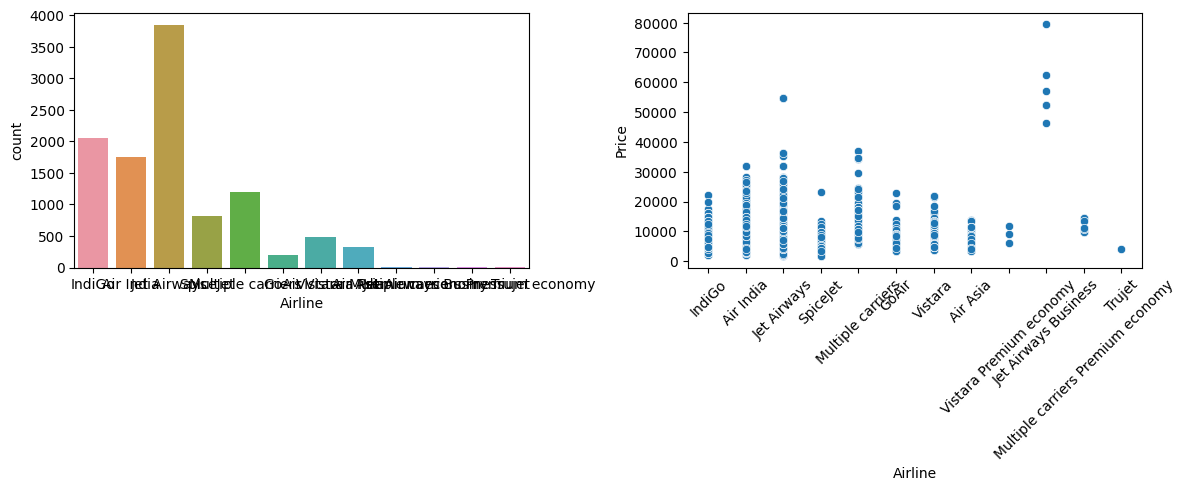

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Airline'],ax=axes[0])
plt.xticks(rotation = 45)

sns.scatterplot(x=df['Airline'],y=df['Price'],ax=axes[1])
plt.xticks(rotation = 45)


plt.show()




/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


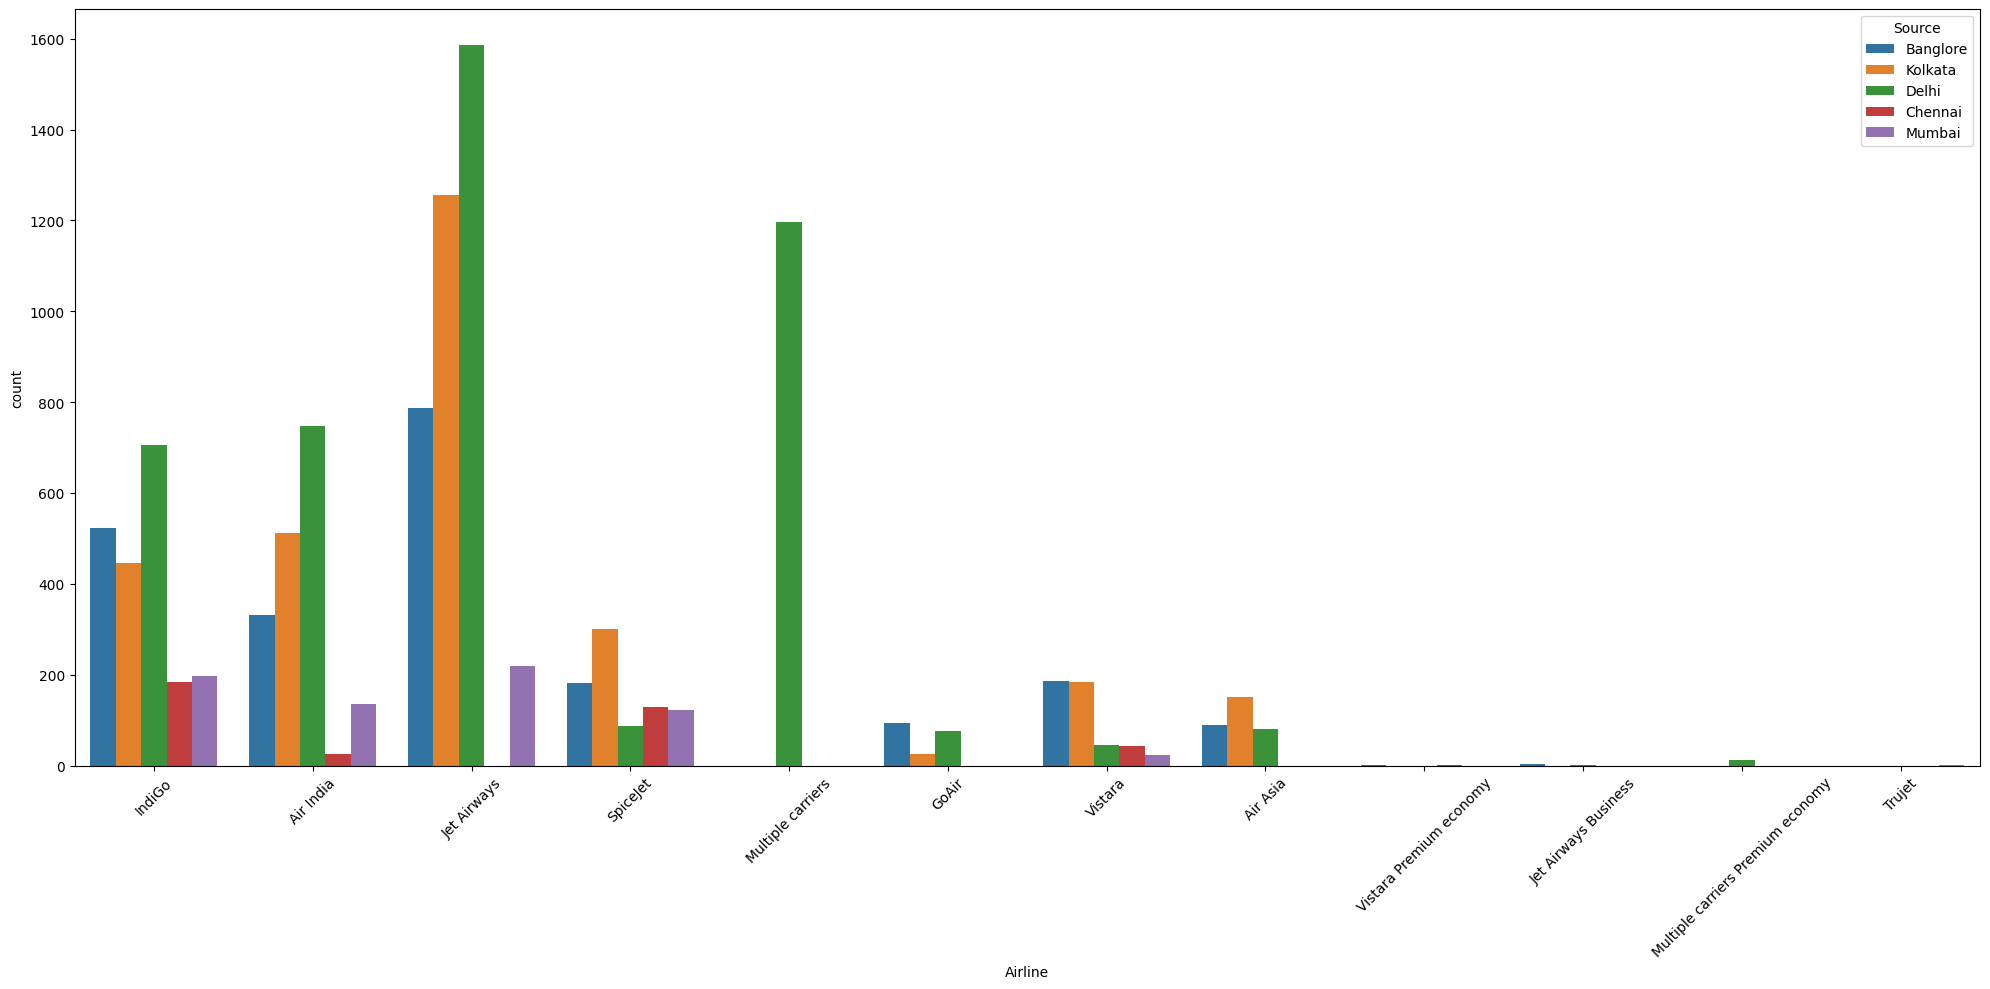

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Airline", hue="Source", data=df)
plt.xticks(rotation = 45)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


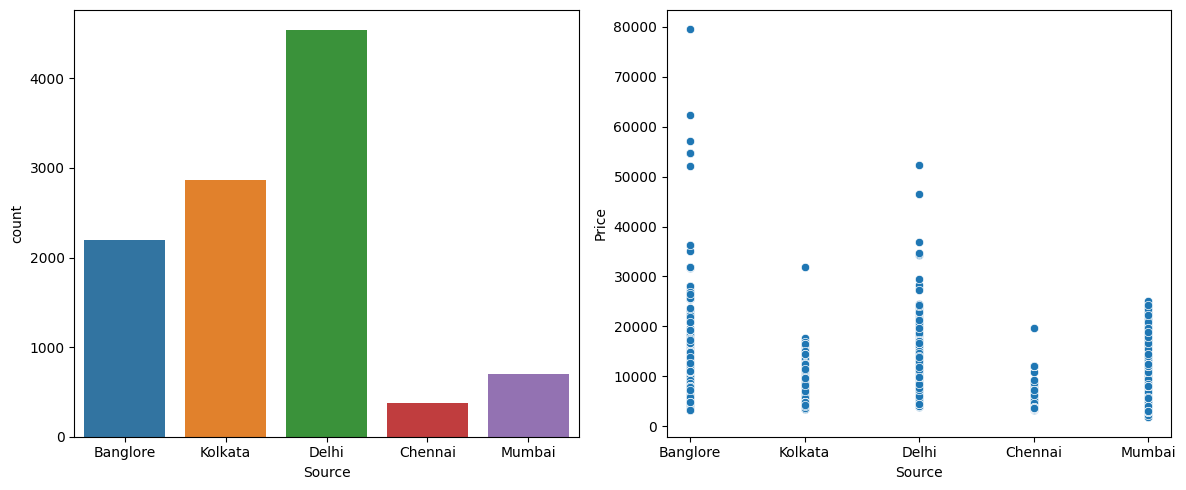

In [55]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Source'],ax=axes[0])
sns.scatterplot(x=df['Source'],y=df['Price'],ax=axes[1])
plt.show()



/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


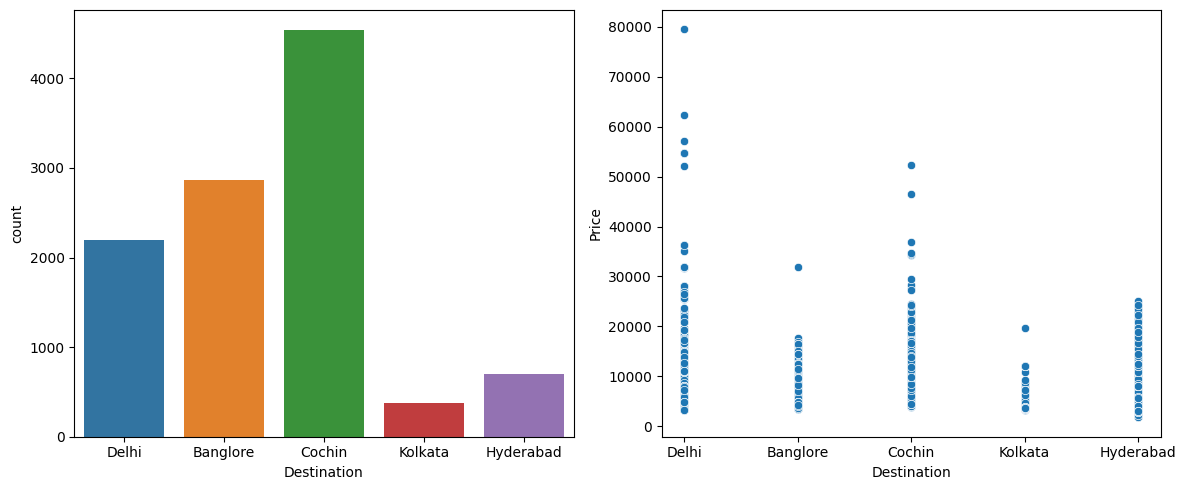

In [56]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Destination'],ax=axes[0])
sns.scatterplot(x=df['Destination'],y=df['Price'],ax=axes[1])
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


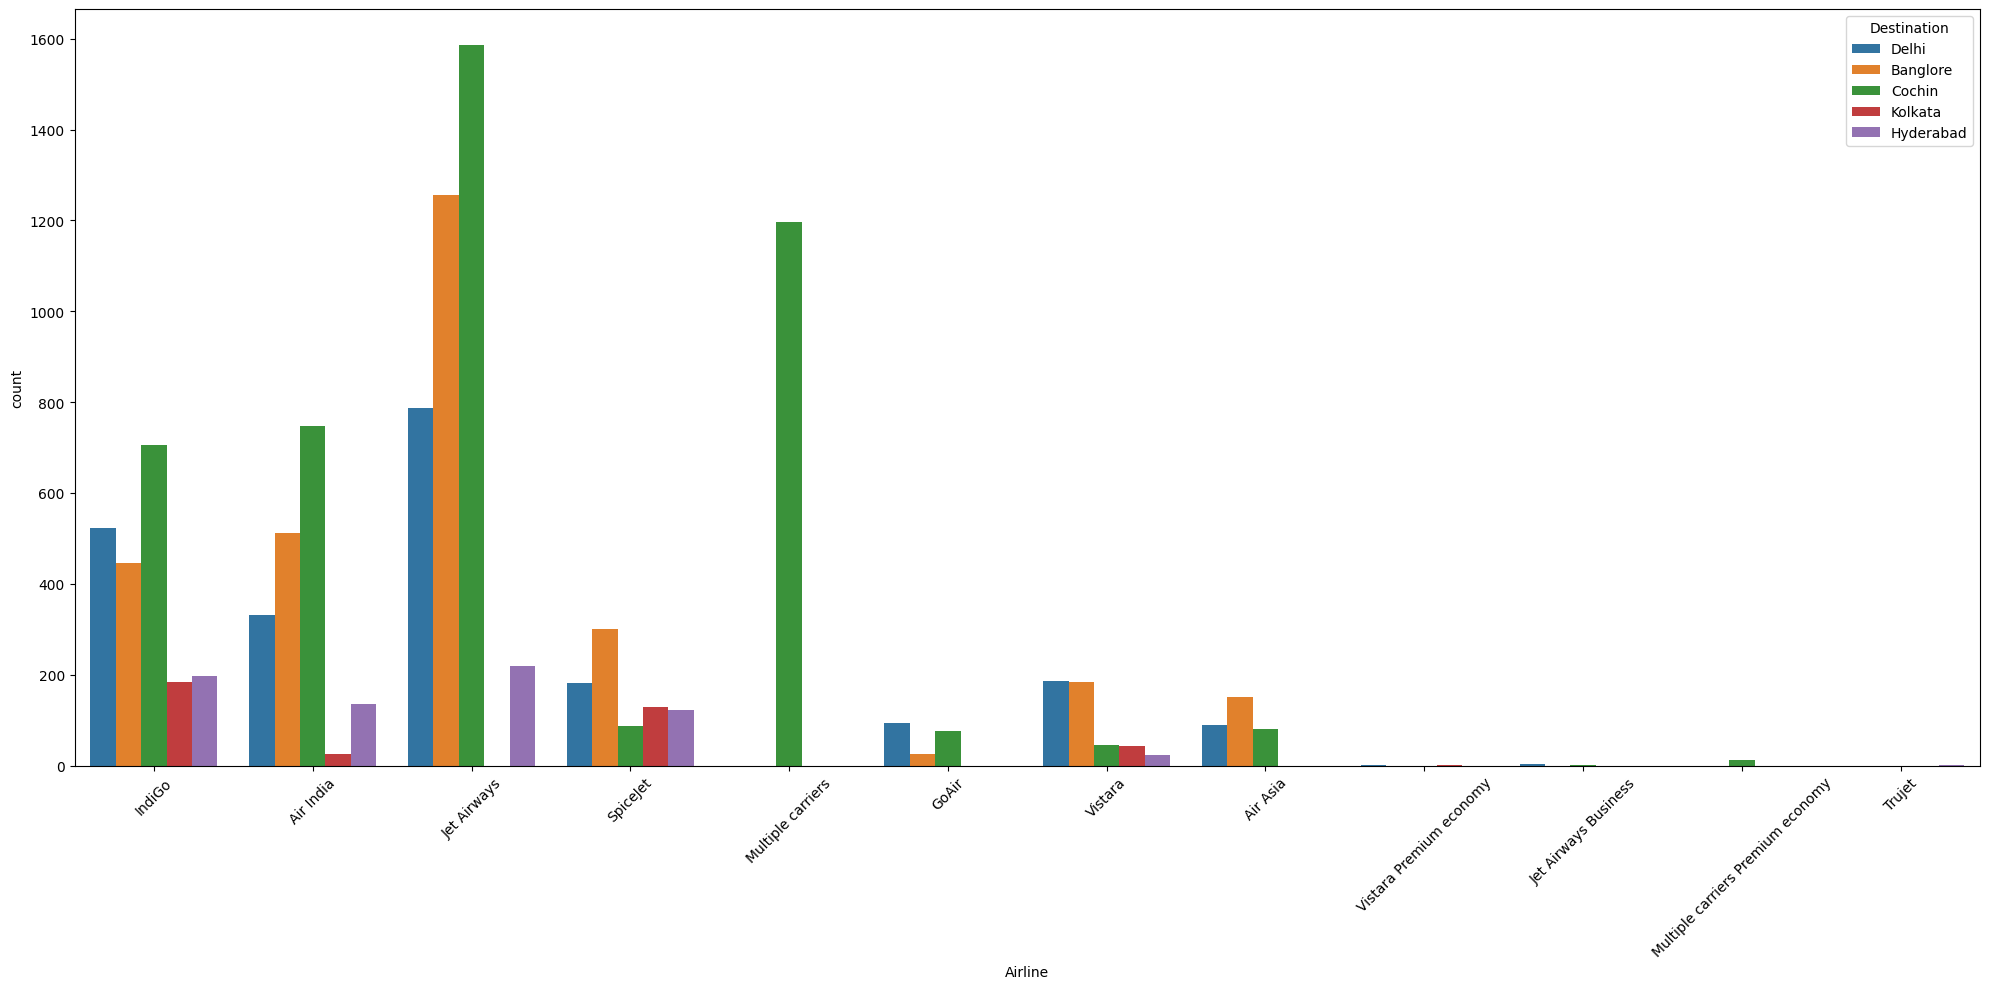

In [57]:
plt.figure(figsize=(20,10))
ay = sns.countplot(x="Airline", hue="Destination", data=df)
plt.xticks(rotation = 45)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


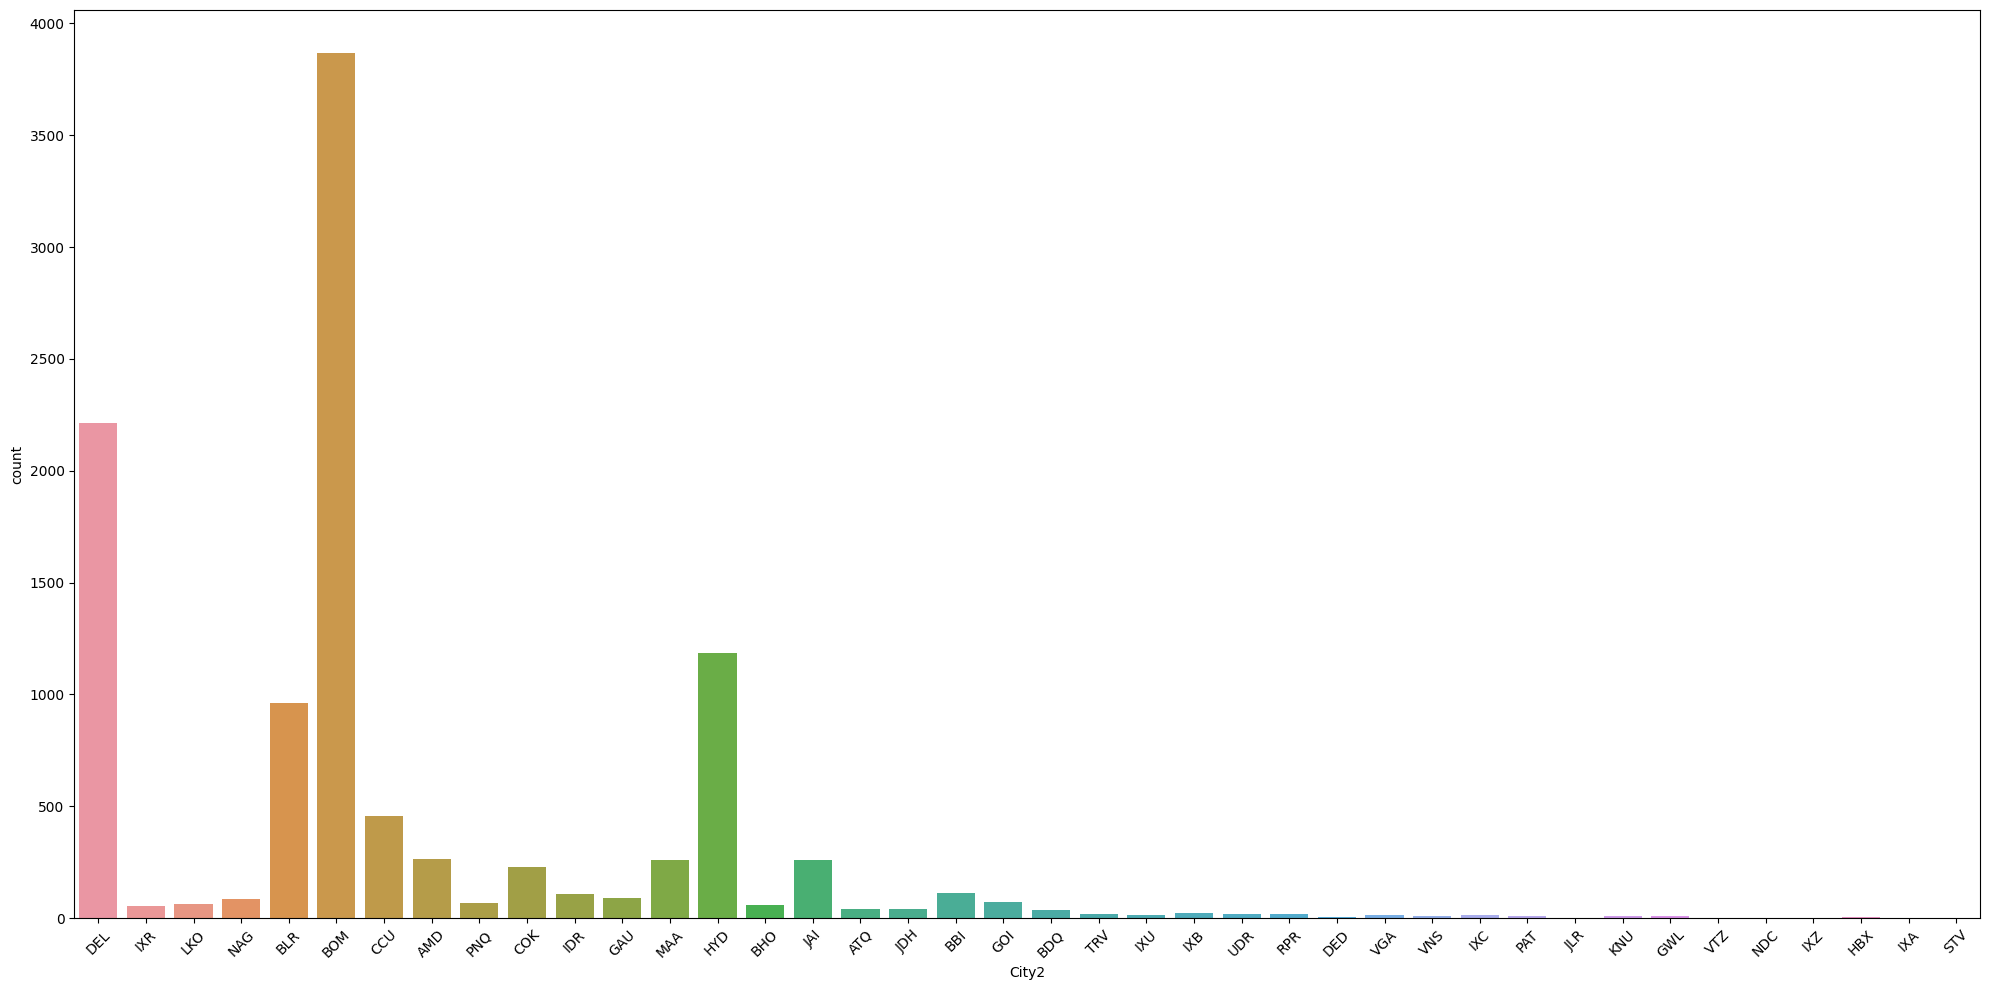

In [58]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot( x=df['City2'])
plt.xticks(rotation = 45)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


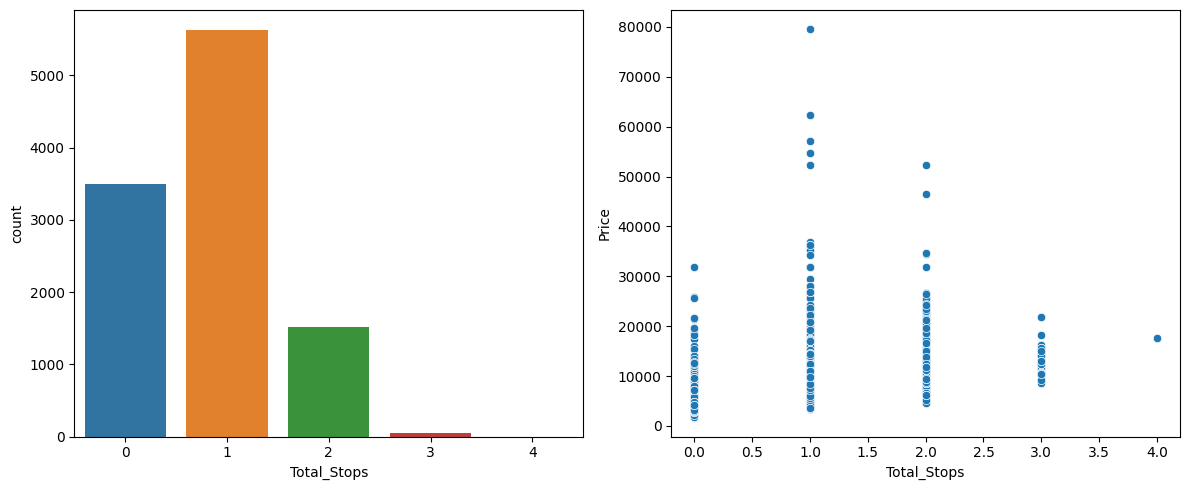

In [59]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Total_Stops'],ax=axes[0])
sns.scatterplot(x=df['Total_Stops'],y=df['Price'],ax=axes[1])

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


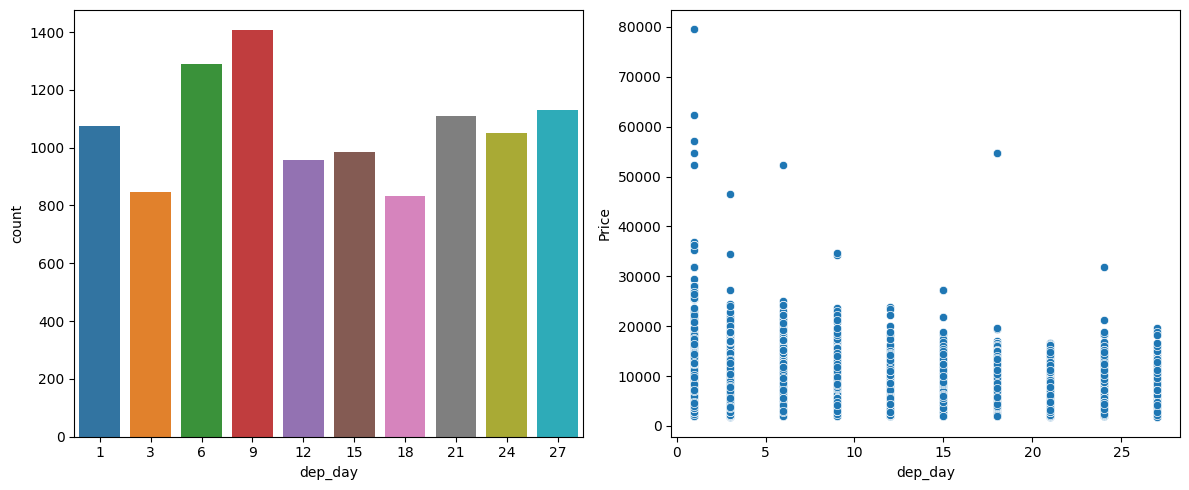

In [60]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['dep_day'],ax=axes[0])
sns.scatterplot(x=df['dep_day'],y=df['Price'],ax=axes[1])


plt.show()




/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


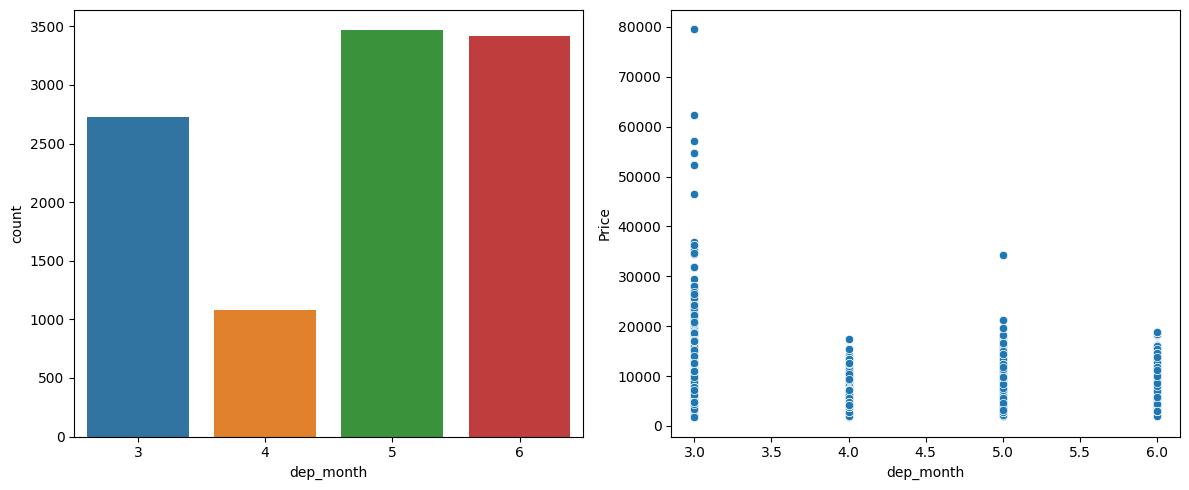

In [61]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['dep_month'],ax=axes[0])
sns.scatterplot(x=df['dep_month'],y=df['Price'],ax=axes[1])


plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


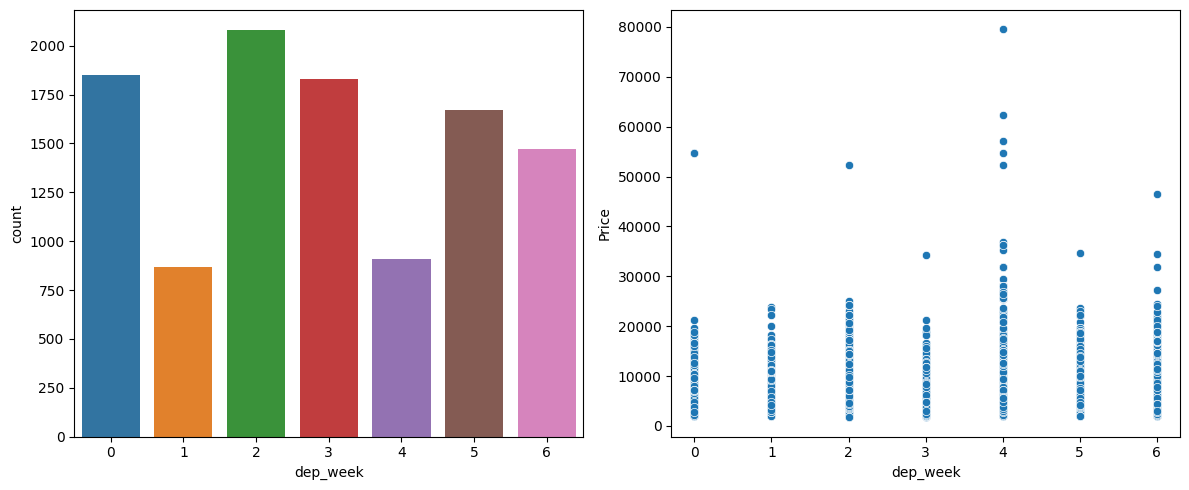

In [62]:
#The day of the week with Monday=0, Sunday=6
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['dep_week'],ax=axes[0])
sns.scatterplot(x=df['dep_week'],y=df['Price'],ax=axes[1])


plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


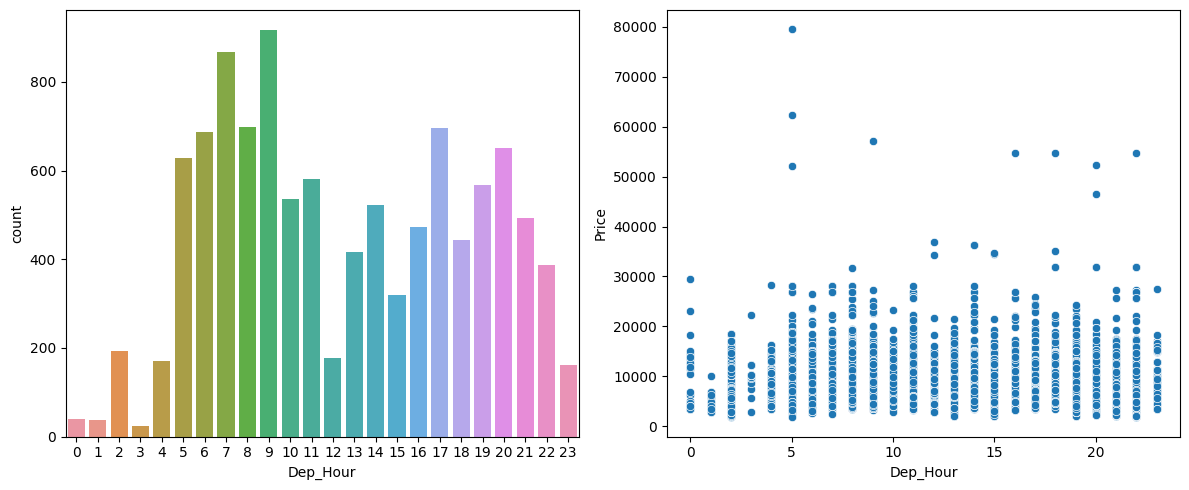

In [63]:
#plt.figure(figsize=(20,10))
#sns.countplot(x=df['Dep_Hour'])
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Dep_Hour'],ax=axes[0])
sns.scatterplot(x=df['Dep_Hour'],y=df['Price'],ax=axes[1])


plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


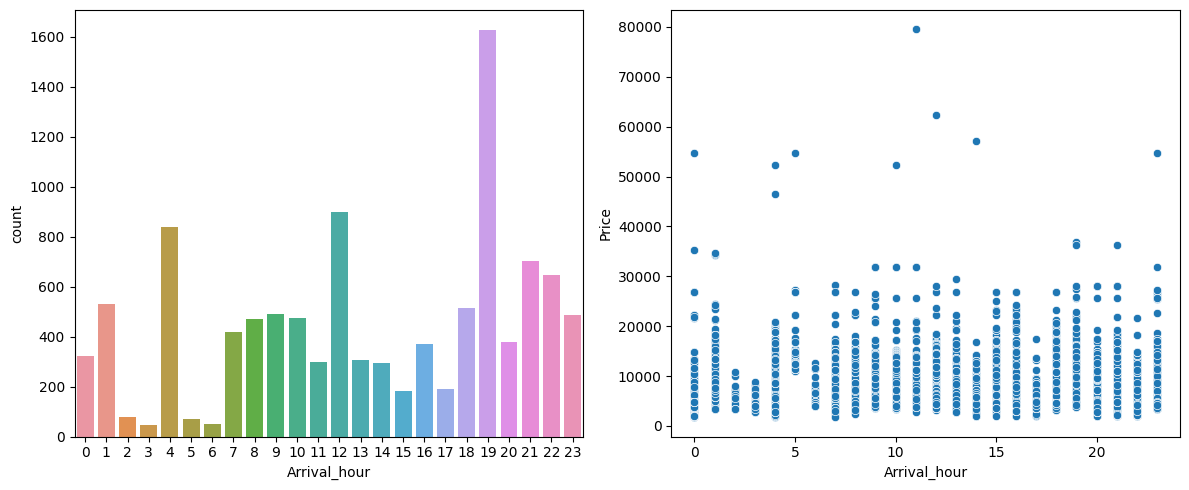

In [64]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Arrival_hour'],ax=axes[0])
sns.scatterplot(x=df['Arrival_hour'],y=df['Price'],ax=axes[1])

plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


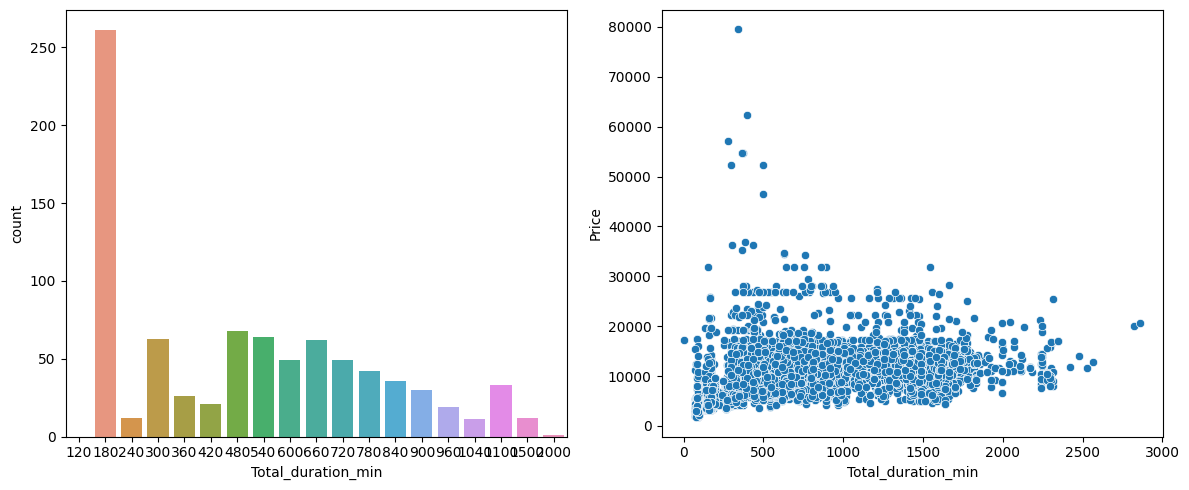

In [65]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes =plt.subplots(1,2)
sns.countplot(x=df['Total_duration_min'],order=[120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1040,1100,1500,2000],ax=axes[0])
sns.scatterplot(x=df['Total_duration_min'],y=df['Price'],ax=axes[1])

plt.show()




In [66]:
#drop jet airways business rows
#df_final = df[df['Airline']!='Jet Airways Business']

In [67]:
df_final = df[df['Price']< 50000]

In [68]:
 df_final.reset_index(drop=True, inplace=True)

In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10675 non-null  object
 1   Source              10675 non-null  object
 2   Destination         10675 non-null  object
 3   Total_Stops         10675 non-null  int64 
 4   Additional_Info     10675 non-null  object
 5   Price               10675 non-null  int64 
 6   dep_day             10675 non-null  int64 
 7   dep_month           10675 non-null  int64 
 8   dep_week            10675 non-null  int64 
 9   Dep_Hour            10675 non-null  int64 
 10  Arrival_date        10675 non-null  int64 
 11  Arrival_hour        10675 non-null  int64 
 12  Total_duration_min  10675 non-null  int64 
 13  City2               10675 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


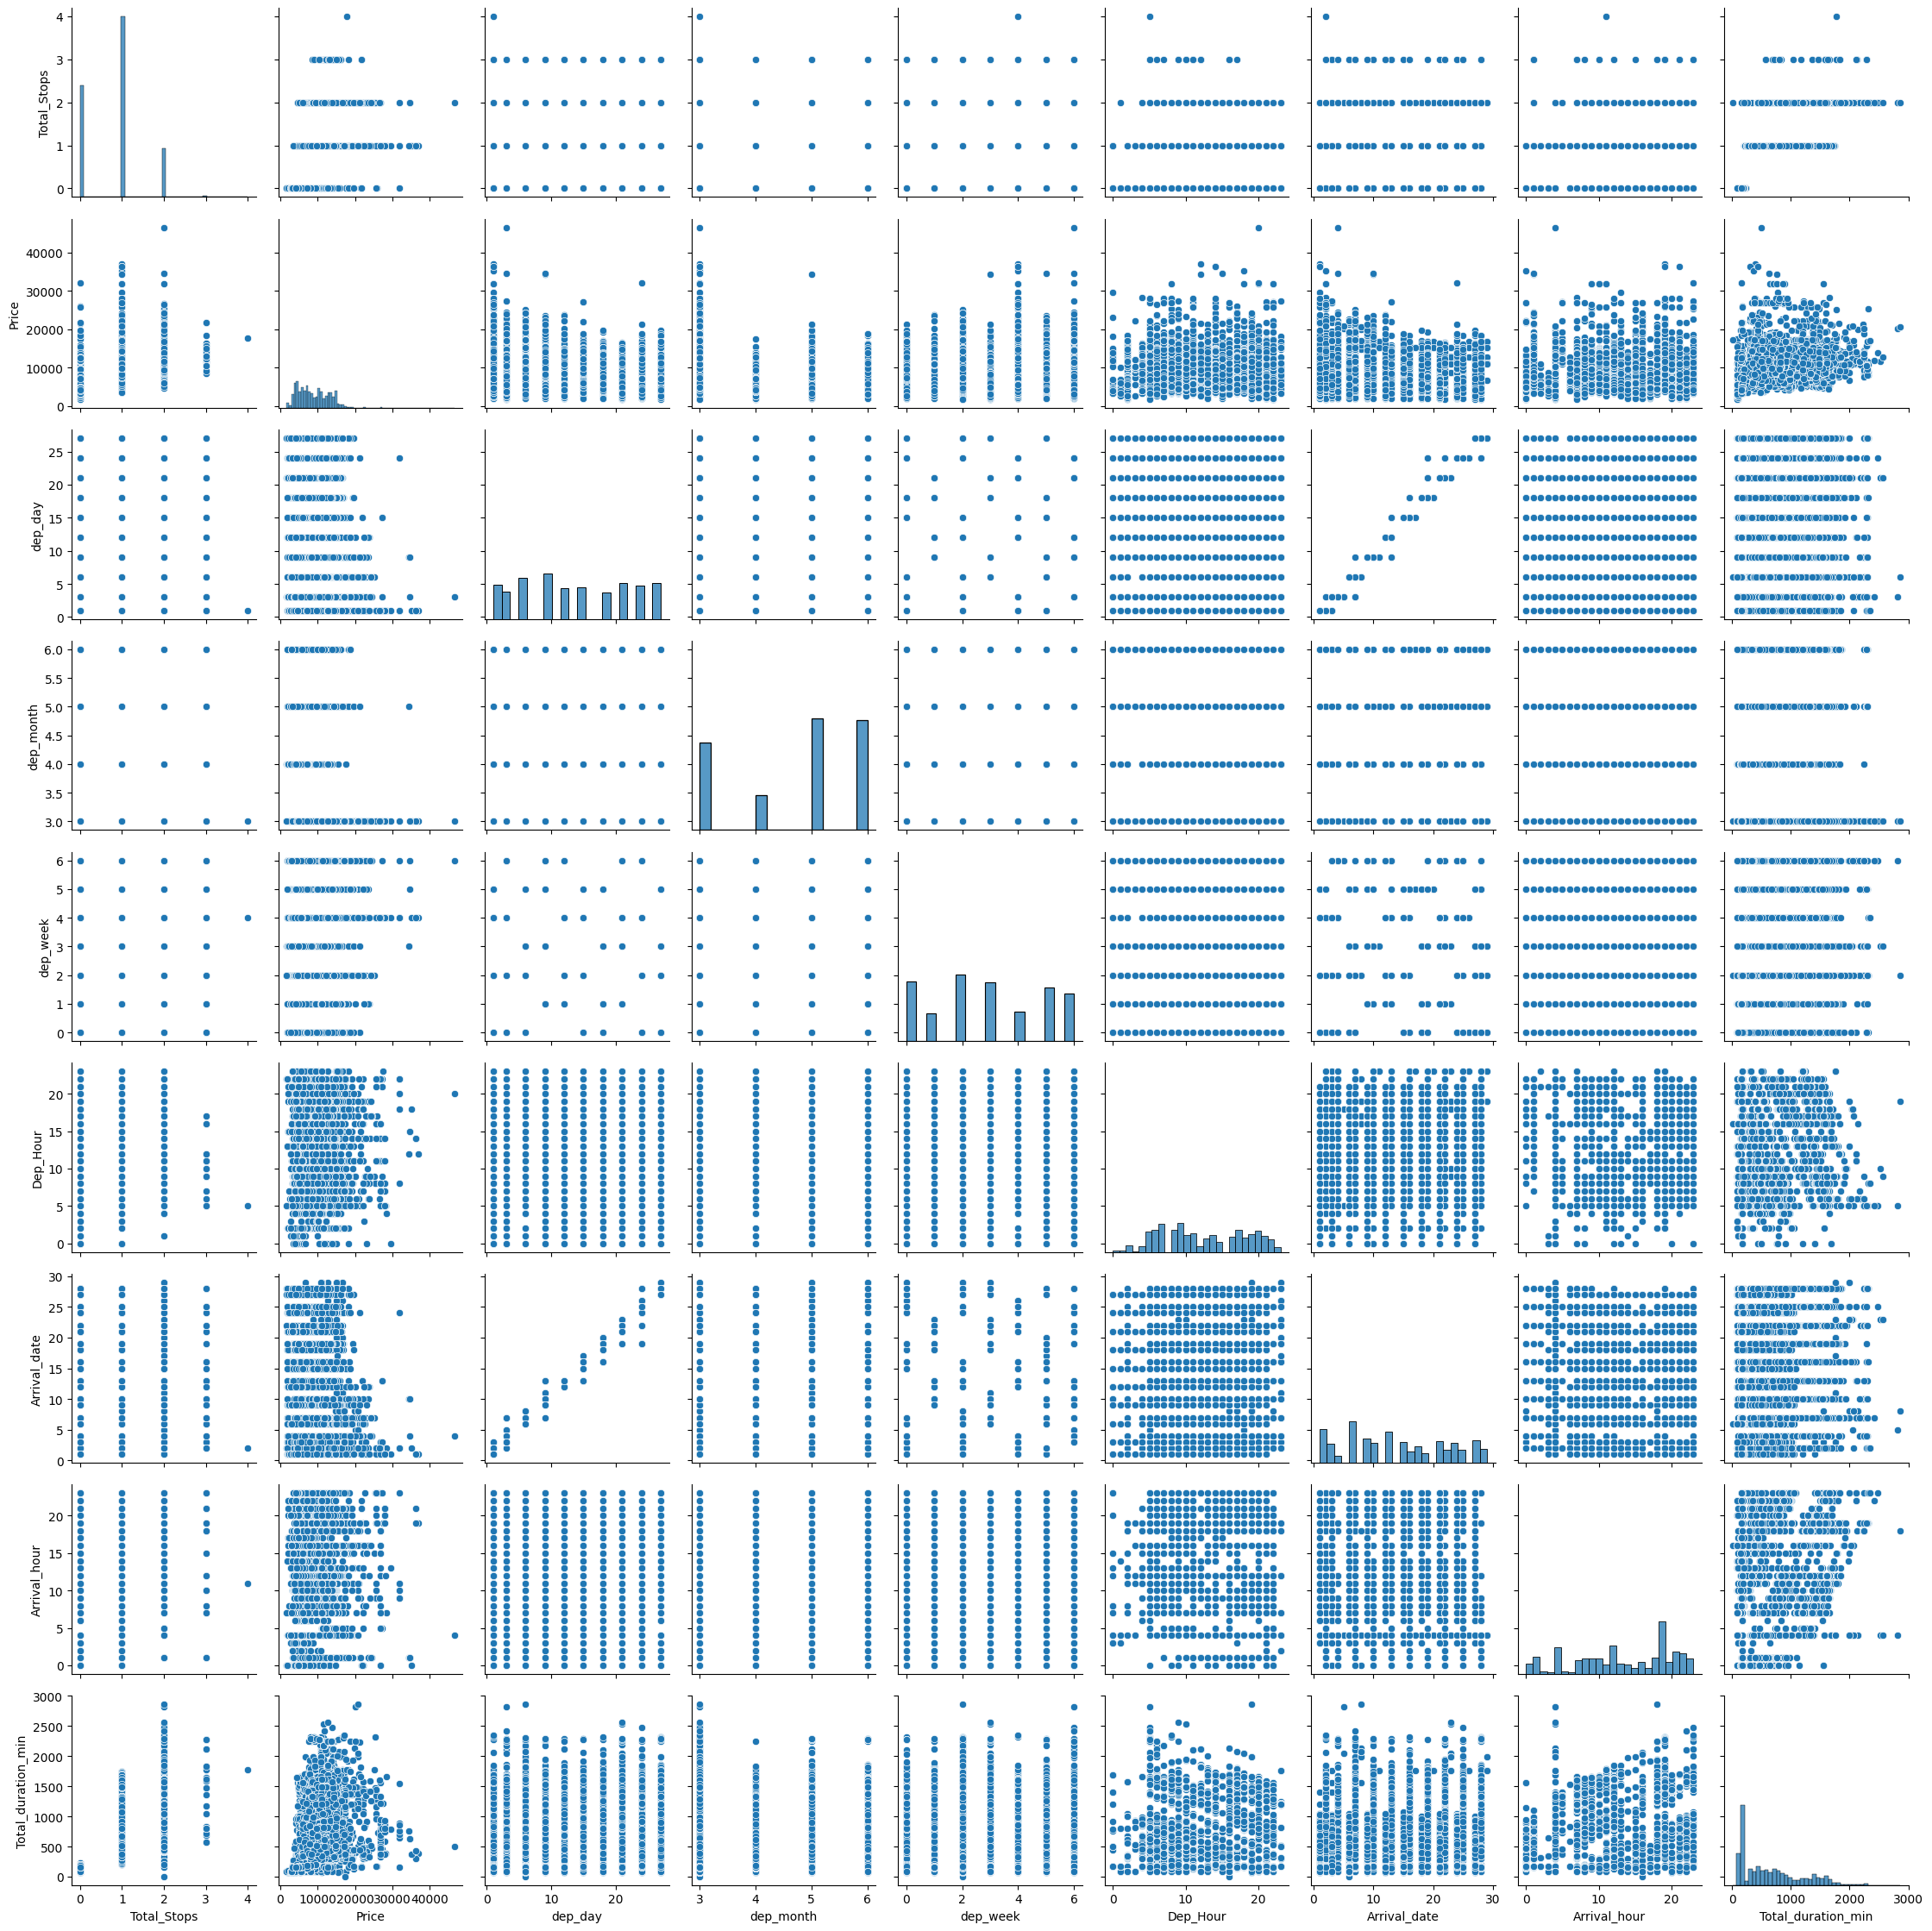

In [70]:
sns.pairplot(df_final)


In [71]:
df_final.corr()

/var/folders/84/ywj1yjc9289cl2byrpqx3q940000gp/T/ipykernel_33212/2875322423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,Total_Stops,Price,dep_day,dep_month,dep_week,Dep_Hour,Arrival_date,Arrival_hour,Total_duration_min
Total_Stops,1.000000,0.628989,-0.009302,0.054960,-0.036913,-0.061789,0.017945,0.038341,0.738488
Price,0.628989,1.000000,-0.153161,-0.096304,0.054410,0.008059,-0.132403,0.029480,0.535123
dep_day,-0.009302,-0.153161,1.000000,-0.039422,-0.090715,0.001661,0.997454,-0.003086,-0.022965
dep_month,0.054960,-0.096304,-0.039422,1.000000,-0.083562,0.039166,-0.035697,-0.004504,0.014283
dep_week,-0.036913,0.054410,-0.090715,-0.083562,1.000000,-0.016142,-0.088140,-0.007597,-0.012951
Dep_Hour,-0.061789,0.008059,0.001661,0.039166,-0.016142,1.000000,0.028471,0.005550,0.001945
Arrival_date,0.017945,-0.132403,0.997454,-0.035697,-0.088140,0.028471,1.000000,-0.033833,0.016192
Arrival_hour,0.038341,0.029480,-0.003086,-0.004504,-0.007597,0.005550,-0.033833,1.000000,0.051286
Total_duration_min,0.738488,0.535123,-0.022965,0.014283,-0.012951,0.001945,0.016192,0.051286,1.000000


In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10675 non-null  object
 1   Source              10675 non-null  object
 2   Destination         10675 non-null  object
 3   Total_Stops         10675 non-null  int64 
 4   Additional_Info     10675 non-null  object
 5   Price               10675 non-null  int64 
 6   dep_day             10675 non-null  int64 
 7   dep_month           10675 non-null  int64 
 8   dep_week            10675 non-null  int64 
 9   Dep_Hour            10675 non-null  int64 
 10  Arrival_date        10675 non-null  int64 
 11  Arrival_hour        10675 non-null  int64 
 12  Total_duration_min  10675 non-null  int64 
 13  City2               10675 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


# Feature Engineering

# categorical encoding

In [73]:
from sklearn.preprocessing import OneHotEncoder


In [74]:

enc = OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(df_final[['Airline', 'Source', 'Destination', 'Additional_Info', 'City2']]).toarray())
  
print(enc_data) 
#Merge with main
new_df=df_final.join(enc_data)
  
print(new_df)

        0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
10670  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10671  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10672  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
10673  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
10674  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14   15   16   17   18   19   20   21   22 

In [87]:
enc.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object),
 array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'],
       dtype=object),
 array(['1 long layover', '1 short layover', '2 long layover',
        'business class', 'change airports', 'in-flight meal not included',
        'no check-in baggage included', 'no info', 'red-eye flight'],
       dtype=object),
 array(['AMD', 'ATQ', 'BBI', 'BDQ', 'BHO', 'BLR', 'BOM', 'CCU', 'COK',
        'DED', 'DEL', 'GAU', 'GOI', 'GWL', 'HBX', 'HYD', 'IDR', 'IXA',
        'IXB', 'IXC', 'IXR', 'IXU', 'IXZ', 'JAI', 'JDH', 'JLR', 'KNU',
        'LKO', 'MAA', 'NAG', 'NDC', 'PAT', 'PNQ', 'RPR', 'STV', 'TRV',
        'UDR', 'VGA', 'VNS', 'VTZ'], dtype=object)]

In [88]:
#drop column
new_df.drop(columns=['Airline','Source','Destination','Additional_Info','City2'], axis=1, inplace=True)


In [89]:
ds_x = new_df.drop(['Price'], axis=1)
y = new_df['Price']


# Regression Models

In [90]:
# create traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(ds_x, y, test_size=0.2, random_state=42)

In [91]:
#LinearRegression from sklearn package

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression(normalize = True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
test_score = r2_score(y_test,y_pred)
train_score = r2_score(y_train,model.predict(X_train))
print("model is",model)
print("R2 for test score is ", test_score)
print("R2 for train score is ", train_score)
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("Root mean squared error",mean_squared_error(y_test,y_pred,squared=False))


model is LinearRegression()
R2 for test score is  0.7480908454609816
R2 for train score is  0.7242248800363774
Mean absolute error 1550.1096005541199
mean_squared_error 4751838.208784131
Root mean squared error 2179.8711449955317


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Plotting the coefficients

In [2]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

NameError: name 'plt' is not defined

In [92]:
# regression with statsmodel

In [93]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
ls.params


const          9955.281174
Total_Stops    3409.403498
dep_day        -170.671876
dep_month      -466.634262
dep_week        165.198402
                  ...     
66             -682.526777
67              622.951506
68            -1535.423755
69             4060.613824
70             -556.202869
Length: 80, dtype: float64

In [94]:
print(ls.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     322.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:58:18   Log-Likelihood:                -78298.
No. Observations:                8540   AIC:                         1.567e+05
Df Residuals:                    8470   BIC:                         1.572e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9955.2812    403

In [95]:
# DecisionTreeRegressor from sklearn package

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
test_score = r2_score(y_test,y_pred)
train_score = r2_score(y_train,model.predict(X_train))
print("model is",model)
print("R2 for test score is ", test_score)
print("R2 for train score is ", train_score)
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("Root mean squared error",mean_squared_error(y_test,y_pred,squared=False))



model is DecisionTreeRegressor()
R2 for test score is  0.8655439512732185
R2 for train score is  0.9953044104933274
Mean absolute error 643.4625292740047
mean_squared_error 2536284.9195029926
Root mean squared error 1592.5717941439855


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [96]:
# Ensemble models

In [97]:
#RandomForestRegressor() from sklearn package
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = RandomForestRegressor()
rfr = model.fit(X_train,y_train)
y_pred_r = model.predict(X_test)
test_score = r2_score(y_test,y_pred)
train_score = r2_score(y_train,model.predict(X_train))
print("model is",model)
print("R2 for test score is ", test_score)
print("R2 for train score is ", train_score)
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("Root mean squared error",mean_squared_error(y_test,y_pred,squared=False))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


model is RandomForestRegressor()
R2 for test score is  0.8655439512732185
R2 for train score is  0.9842822423910053
Mean absolute error 643.4625292740047
mean_squared_error 2536284.9195029926
Root mean squared error 1592.5717941439855


In [98]:
#Gradient Boosting Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
test_score = r2_score(y_test,y_pred)
train_score = r2_score(y_train,model.predict(X_train))
print("model is",model)
print("R2 for test score is ", test_score)
print("R2 for train score is ", train_score)
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("Root mean squared error",mean_squared_error(y_test,y_pred,squared=False))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


model is GradientBoostingRegressor()
R2 for test score is  0.8591795760532217
R2 for train score is  0.8432510453563626
Mean absolute error 1152.966554598422
mean_squared_error 2656338.0450067567
Root mean squared error 1629.8276120518872


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


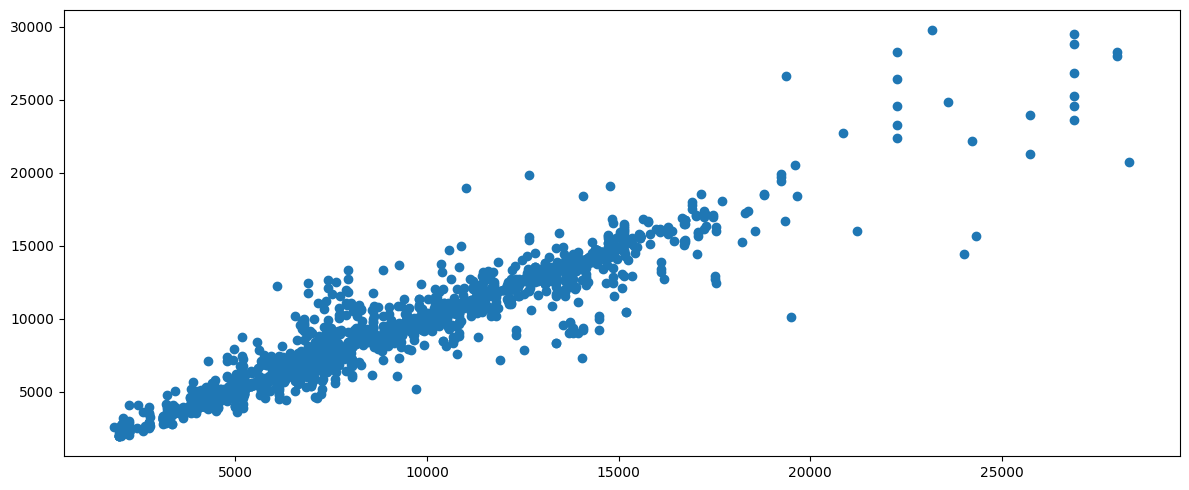

In [99]:
plt.scatter(y_test,y_pred_r)


In [101]:
#selected Random Forest Regressor with R2 value of 0.93
Predicted_value = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_r})


In [102]:
Predicted_value

,Actual,Predicted
5515,8855,7147.530000
1208,10991,11249.160000
7722,4544,4471.320000
2085,9314,9499.180000
2458,4823,4934.579333
...,...,...
10055,18804,18521.660000
2260,9663,9617.680000
8610,2017,1985.880000
8982,9836,12363.657500
